# Project Statement:
### Portobello Tech is an app innovator who has devised an intelligent way of predicting employee turnover within the company. It periodically evaluates employees' work details, including the number of projects they worked on, average monthly working hours, time spent in the company, promotions in the last five years, and salary level.
### Data from prior evaluations shows the employees’ satisfaction in the workplace. The data could be used to identify patterns in work style and their interest in continuing to work for the company.
### The HR Department owns the data and uses it to predict employee turnover. Employee turnover refers to the total number of workers who leave a company over time.
### As the ML Developer assigned to the HR Department, we have been asked to create ML programs to:
### 1. Perform data quality checks by checking for missing values, if any.
### 2. Understand what factors contributed most to employee turnover at EDA.
### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
### 4. Handle the left Class Imbalance using the SMOTE technique.
### 5. Perform k-fold cross-validation model training and evaluate performance.
### 6. Identify the best model and justify the evaluation metrics used.
### 7. Suggest various retention strategies for targeted employees.

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

### Load data into a data frame and check firtst 5 rows

In [121]:
# open hr_comma_sep.csv
df = pd.read_csv('hr_comma_sep.csv')

# check head of the data
print(df.head())


   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4 

### It appears that there are 10 columns in the dataset and the 9th column is wrongly labeld as 'sales' whereas it appears to hold the value of the 'department' to which the employee belongs

In [122]:
# check the unique value of the 'sales' column
print(df['sales'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


### We will change the 'sales' column name to 'department

In [123]:
# Change the name of the column 'sales' to 'department'
df.rename(columns = {'sales':'department'}, inplace = True)

# print column names
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')


### Print information about the data frame to identify any missing values or other anomalies

In [124]:
# check info of the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


### It does not appear that any of the columns in our data set have missing values
### We will now check for unique values for our 10 columns


In [125]:
# Check the unique values for each of the 10 columns in the data
for col in df.columns:
    print(col, df[col].unique())
    print()

satisfaction_level [0.38 0.8  0.11 0.72 0.37 0.41 0.1  0.92 0.89 0.42 0.45 0.84 0.36 0.78
 0.76 0.09 0.46 0.4  0.82 0.87 0.57 0.43 0.13 0.44 0.39 0.85 0.81 0.9
 0.74 0.79 0.17 0.24 0.91 0.71 0.86 0.14 0.75 0.7  0.31 0.73 0.83 0.32
 0.54 0.27 0.77 0.88 0.48 0.19 0.6  0.12 0.61 0.33 0.56 0.47 0.28 0.55
 0.53 0.59 0.66 0.25 0.34 0.58 0.51 0.35 0.64 0.5  0.23 0.15 0.49 0.3
 0.63 0.21 0.62 0.29 0.2  0.16 0.65 0.68 0.67 0.22 0.26 0.99 0.98 1.
 0.52 0.93 0.97 0.69 0.94 0.96 0.18 0.95]

last_evaluation [0.53 0.86 0.88 0.87 0.52 0.5  0.77 0.85 1.   0.54 0.81 0.92 0.55 0.56
 0.47 0.99 0.51 0.89 0.83 0.95 0.57 0.49 0.46 0.62 0.94 0.48 0.8  0.74
 0.7  0.78 0.91 0.93 0.98 0.97 0.79 0.59 0.84 0.45 0.96 0.68 0.82 0.9
 0.71 0.6  0.65 0.58 0.72 0.67 0.75 0.73 0.63 0.61 0.76 0.66 0.69 0.37
 0.64 0.39 0.41 0.43 0.44 0.36 0.38 0.4  0.42]

number_project [2 5 7 6 4 3]

average_montly_hours [157 262 272 223 159 153 247 259 224 142 135 305 234 148 137 143 160 255
 282 147 304 139 158 242 239 128 132 294 134 

### We will now describe the data in the numerical columns

In [126]:
# Desicribe numerical columns
print(df.describe())

       satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.

### We will convert the salary column to a numerical column

In [127]:
# Convert the 'salary' column to numerical values using dummy variables
##df = pd.get_dummies(df, columns=['salary'], drop_first=True,dtype='int64')
#print(df.head())

### Create a pair plot to visualize relationship bettween features

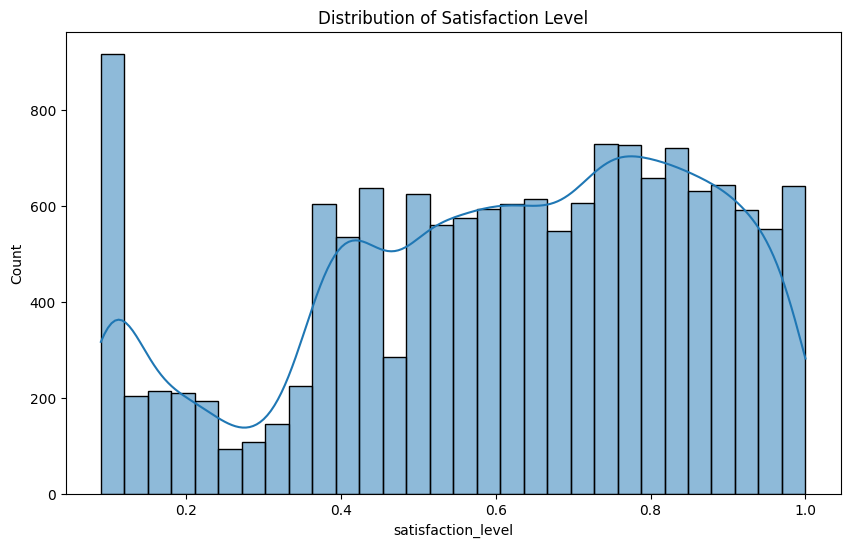

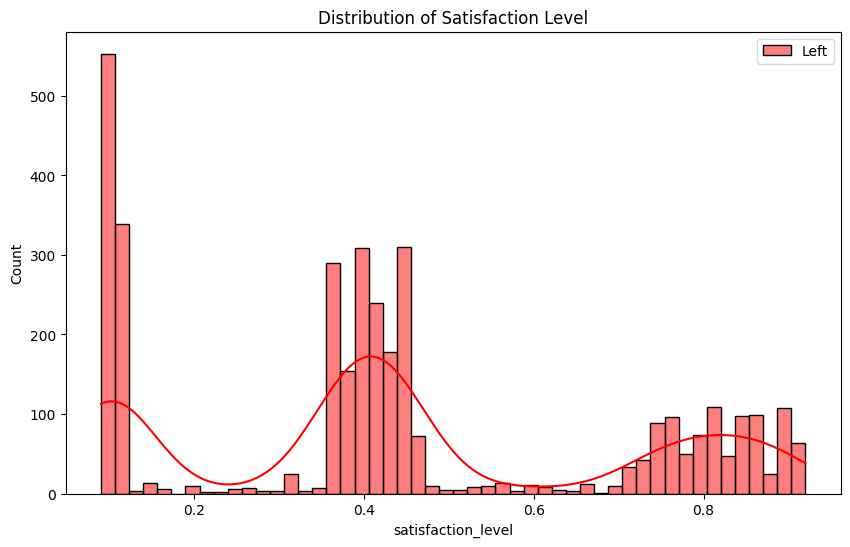

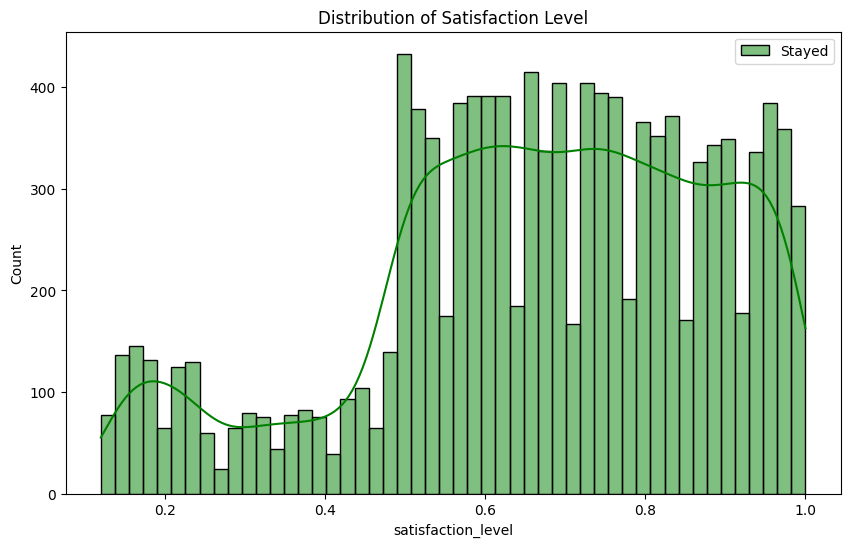

Total number of employees who left: 3571 .... 23.81 %
Number of employees who left with low salary: 2172 .... 60.82 %
Number of employees who left with low salary and satisfaction level less than .5: 1552 ... 71.45 %
Number of employees who left with satisfaction level less than .5: 2547 .... 71.32 %


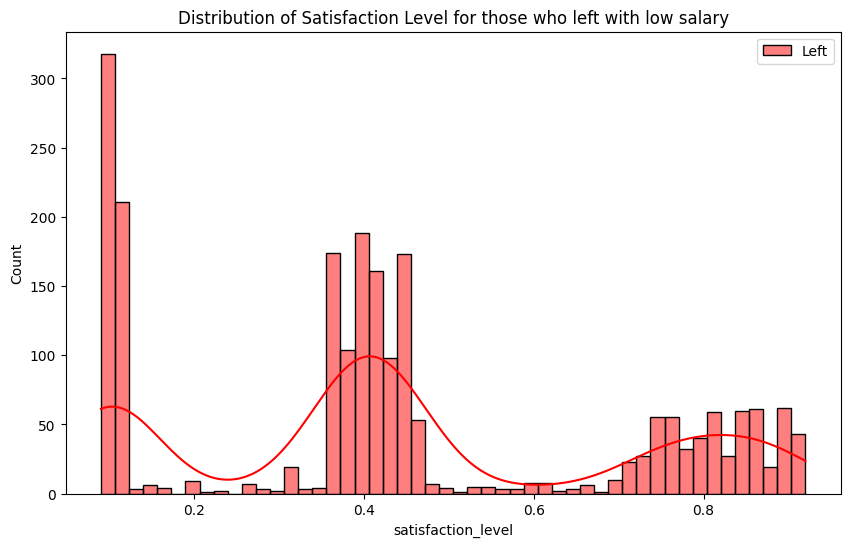

Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6: 963


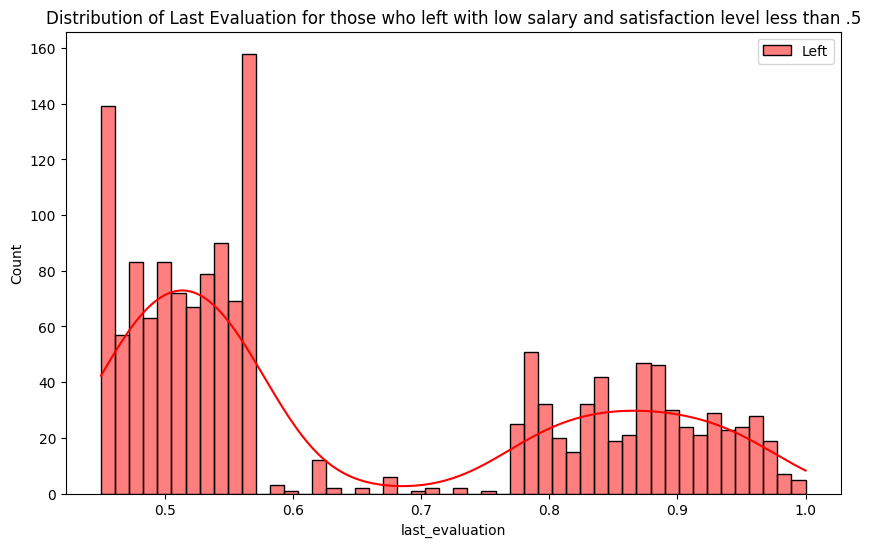

Average Monthly Hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6: 146.66251298026998


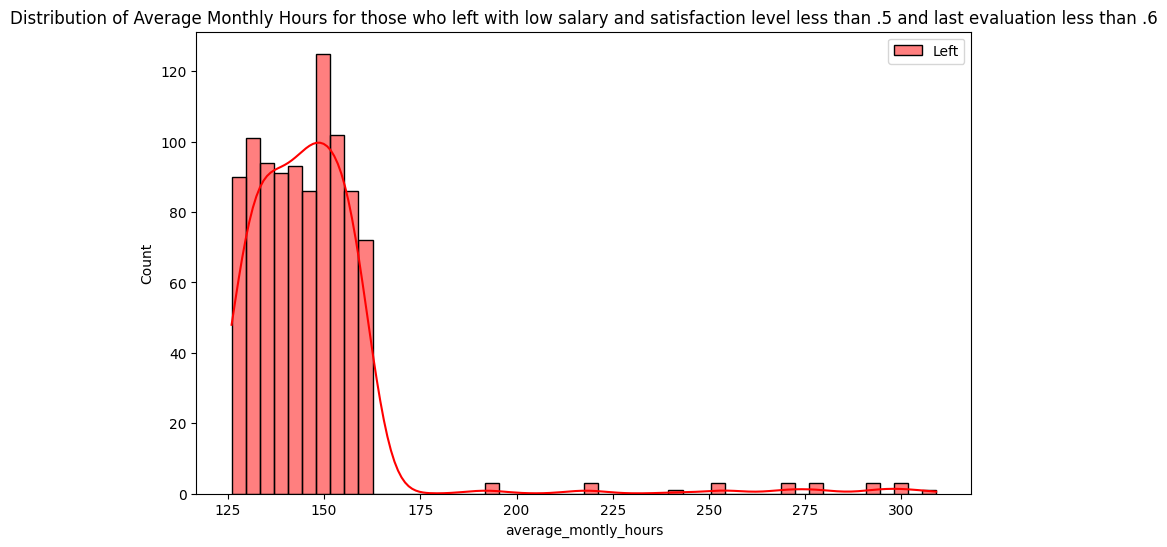

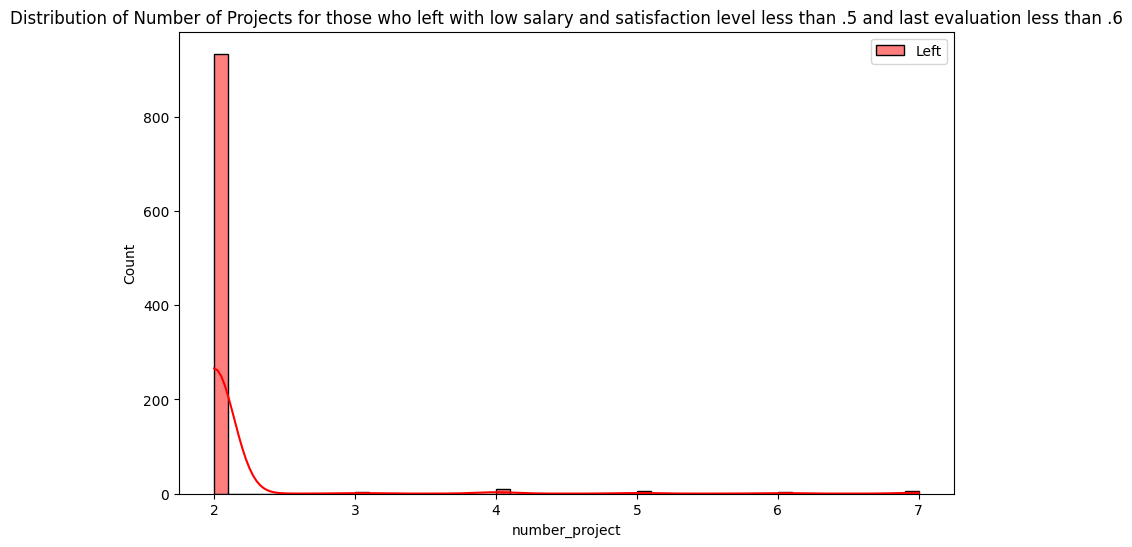

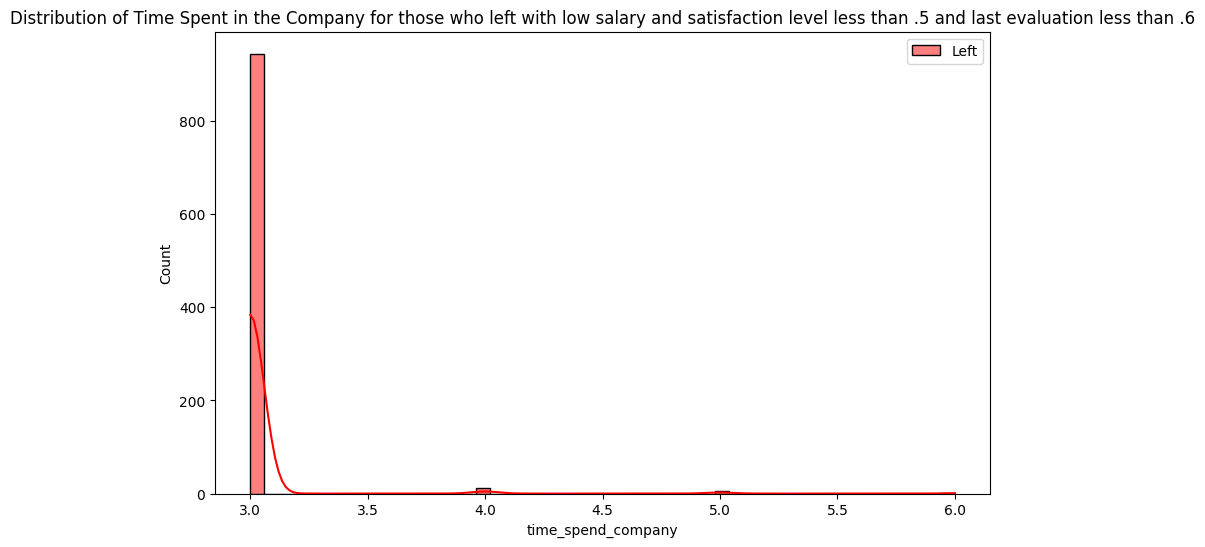

Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a work accident: 44
Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years: 8
Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years: 0
Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who han no promotion in the last 5 years: 58
Total number of employees who left after being promoted: 19
Total number of employees who stayed after being promoted: 300
Total number of employees who were promoted: 319
Number of employees who were promoted with satisfaction level less th

ValueError: could not convert string to float: 'low'

In [128]:
### Plot the distribution of the numerical columns
# plot satisfaction_level
plt.figure(figsize=(10,6))
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Distribution of Satisfaction Level')
plt.show()

# Plot satisfaction level for those who left 
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['satisfaction_level'], kde=True, color='red', label='Left',bins=50)
#sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, color='green', label='Stayed')
plt.title('Distribution of Satisfaction Level')
plt.legend()
plt.show()

# plot satisfaction_level for those who stayed
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==0]['satisfaction_level'], kde=True, color='green', label='Stayed',bins=50)
plt.title('Distribution of Satisfaction Level')
plt.legend()
plt.show()

# Total Number of employees who left
print('Total number of employees who left:',df[df['left']==1].shape[0],'....',round(df[df['left']==1].shape[0]/df.shape[0]*100,2),'%')
# Number of employees who left that had a low salary
print('Number of employees who left with low salary:',df[(df['left']==1) & (df['salary']=='low')].shape[0],'....',round(df[(df['left']==1) & (df['salary']=='low')].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
# Number of employees who left that had a los salary and a satisfaction level of less than .5
print('Number of employees who left with low salary and satisfaction level less than .5:',df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5)].shape[0],'...',round(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5)].shape[0]/df[(df['left']==1) & (df['salary']=='low')].shape[0]*100,2),'%')
# Number of employees who left with a satisfacxtion level of less than .5
print('Number of employees who left with satisfaction level less than .5:',df[(df['left']==1) & (df['satisfaction_level']<0.5)].shape[0],'....',round(df[(df['left']==1) & (df['satisfaction_level']<0.5)].shape[0]/df[df['left']==1].shape[0]*100,2),'%')
# Satisfaction level distribution for those who left with low salary
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low')]['satisfaction_level'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Satisfaction Level for those who left with low salary')
plt.legend()
plt.show()
# Number of employees who left and had low salary with satisfaction level less than .5 and last evaluation less than .6
print('Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)].shape[0])

# Distribution of last evaluation for those who left with low salary and satisfaction level less than .5
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5)]['last_evaluation'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Last Evaluation for those who left with low salary and satisfaction level less than .5')
plt.legend()
plt.show()

# Print average monthly hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
print('Average Monthly Hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['average_montly_hours'].mean())

# Plot distribution of monthly hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['average_montly_hours'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Average Monthly Hours for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6')
plt.legend()
plt.show()

# Plot distribution of number of projects for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['number_project'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Number of Projects for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6')
plt.legend()
plt.show()

# Plot distribution of time spent in the company for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6)]['time_spend_company'], kde=True, color='red', label='Left',bins=50)
plt.title('Distribution of Time Spent in the Company for those who left with low salary and satisfaction level less than .5 and last evaluation less than .6')
plt.legend()
plt.show()

# Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a work accident
print('Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a work accident:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['Work_accident']==1)].shape[0])

# Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years
print('Number of employees who left with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years:',
      df[(df['left']==1) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['promotion_last_5years']==1)].shape[0])
print ('Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who had a promotion in the last 5 years:',
       df[(df['left']==0) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['promotion_last_5years']==1)].shape[0])
print('Number of employees who stayed with low salary and satisfaction level less than .5 and last evaluation less than .6 and number of projects less than 3 who han no promotion in the last 5 years:',
      df[(df['left']==0) & (df['salary']=='low') & (df['satisfaction_level']<0.5) & (df['last_evaluation']<.6) & (df['number_project']<3) & (df['promotion_last_5years']==0)].shape[0])
# Total number of promoted employees who left
print('Total number of employees who left after being promoted:',df[(df['left']==1) & (df['promotion_last_5years']==1)].shape[0])
# Total number of promoted employees who stayed
print('Total number of employees who stayed after being promoted:',df[(df['left']==0) & (df['promotion_last_5years']==1)].shape[0])
# Total number of promoted employees
print('Total number of employees who were promoted:',df[df['promotion_last_5years']==1].shape[0])
# Number of employees who were promoted that had a satisfaction level of less than .5
print('Number of employees who were promoted with satisfaction level less than .5:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5)].shape[0])
# Number of employees who were promoted that had a last evaluation of less than .6
print('Number of employees who were promoted with last evaluation less than .6:',df[(df['promotion_last_5years']==1) & (df['last_evaluation']<0.6)].shape[0])
# Number of employees who were promoted that had a satisfaction level of less than .5 and a last evaluation of less than .6
print('Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5) & (df['last_evaluation']<0.6)].shape[0])
# Number of employees who were promoted that had a satisfaction level of less than .5 and a last evaluation of less than .6 and a low salary
print('Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6 and low salary:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5) & (df['last_evaluation']<0.6) & (df['salary']=='low')].shape[0])
# Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6 and low salary who left
print('Number of employees who were promoted with satisfaction level less than .5 and last evaluation less than .6 and low salary who left:',df[(df['promotion_last_5years']==1) & (df['satisfaction_level']<0.5) & (df['last_evaluation']<0.6) & (df['salary']=='low') & (df['left']==1)].shape[0])



print()




# Number of employees who left that had a medium salary
print('Number of employees who left with medium salary:',df[(df['left']==1) & (df['salary']=='medium')].shape[0],'....',round(df[(df['left']==1) & (df['salary']=='medium')].shape[0]/df[df['left']==1].shape[0]*100,2),'%)')
# Number of employees who left that had a high salary
print('Number of employees who left with high salary:',df[(df['left']==1) & (df['salary']=='high')].shape[0],'....',round(df[(df['left']==1) & (df['salary']=='high')].shape[0]/df[df['left']==1].shape[0]*100,2),'%)')
print()
# Number of people who left with a satisfaction level less than 0.5
print('Employees with satisfaction level of less than .05 who left:',df[(df['left']==1) & (df['satisfaction_level']<0.5)].shape[0])
# print salary distribution for those who left with a satisfaction level less than 0.5
print('Salaries for employees who left with satisfaction level less than 0.5:',df[(df['left']==1) & (df['satisfaction_level']<0.5)]['salary'].value_counts())
# Number of employees who stayed with a satisfaction level less than 0.5
print('Employees with satisfaction level of less than .05 who stayed:',df[(df['left']==0) & (df['satisfaction_level']<0.5)].shape[0])
# print salary distribution for those who stayed with a satisfaction level less than 0.5
print('Salaries for employees who stayed with satisfaction level less than 0.5:',df[(df['left']==0) & (df['satisfaction_level']<0.5)]['salary'].value_counts())
# Number of employees who left with a satisfaction level between 0.5 and .75
print('Employees with satisfaction level between 0.5 and .75 who left:',df[(df['left']==1) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)].shape[0])
# print salary distribution for those who left with a satisfaction level between 0.5 and .75
print('Salaries for employees who left with satisfaction level between 0.5 and 0.75:',df[(df['left']==1) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)]['salary'].value_counts())
# Number of employees who stayed with a satisfaction level between 0.5 and .75
print('Employees with satisfaction level between 0.5 and .75 who stayed:',df[(df['left']==0) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)].shape[0])
#print salary distribution for those who stayed with a satisfaction level between 0.5 and .75
print('Salaries for employees who stayed with satisfaction level between 0.5 and 0.75:',df[(df['left']==0) & (df['satisfaction_level']>=0.5) & (df['satisfaction_level']<=0.75)]['salary'].value_counts())
# Number of employees who left with a satisfaction level greater than 0.75
print('Employees with satisfaction level greater than 0.75 who left:',df[(df['left']==1) & (df['satisfaction_level']>0.75)].shape[0])
# print salary distribution for those who left with a satisfaction level greater than 0.75
print('Salaries for employees who left with satisfaction level greater than 0.75:',df[(df['left']==1) & (df['satisfaction_level']>0.75)]['salary'].value_counts())

# Print correlation levels between satisfaction level and other columns
print('Correlation between satisfaction level and last evaluation:',df['satisfaction_level'].corr(df['last_evaluation']))
print('Correlation between satisfaction level and number of projects:',df['satisfaction_level'].corr(df['number_project']))
print('Correlation between satisfaction level and average monthly hours:',df['satisfaction_level'].corr(df['average_montly_hours']))
print('Correlation between satisfaction level and time spent in the company:',df['satisfaction_level'].corr(df['time_spend_company']))
print('Correlation between satisfaction level and work accident:',df['satisfaction_level'].corr(df['Work_accident']))
print('Correlation between satisfaction level and left:',df['satisfaction_level'].corr(df['left']))
print('Correlation between satisfaction level and promotion in the last 5 years:',df['satisfaction_level'].corr(df['promotion_last_5years']))
print('Correlation between satisfaction level and salary:',df['satisfaction_level'].corr(df['salary']))



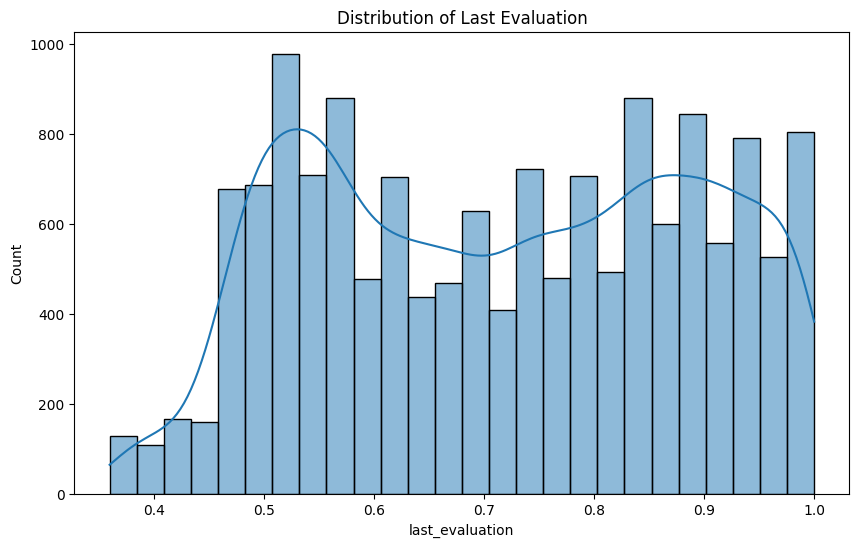

In [35]:
# plot last_evaluation
plt.figure(figsize=(10,6))
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Distribution of Last Evaluation')
plt.show()

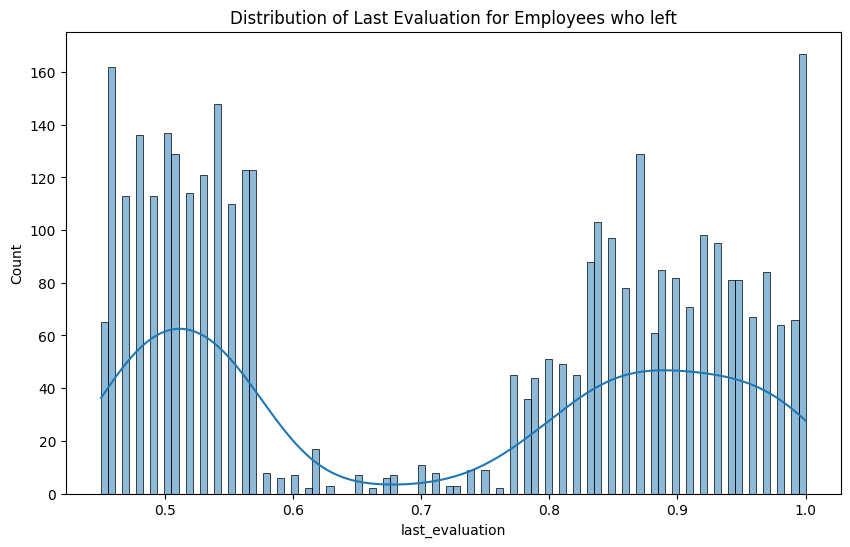

3571


In [45]:
# plot how many left company for each last_evaluation score
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who left')
plt.show()
# print how many employees left company in total
print(df['left'].sum())

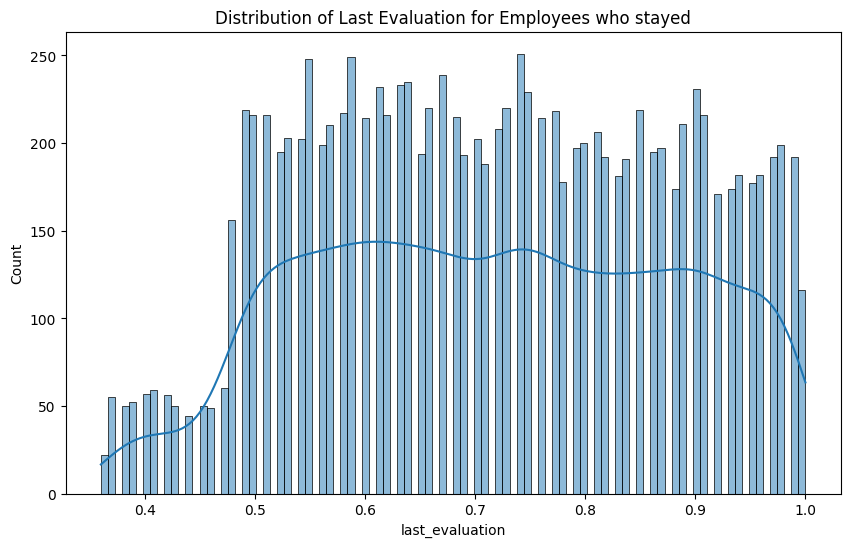

In [44]:
# Plot how many stayed for each last_evaluation score
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==0]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who stayed')
plt.show()


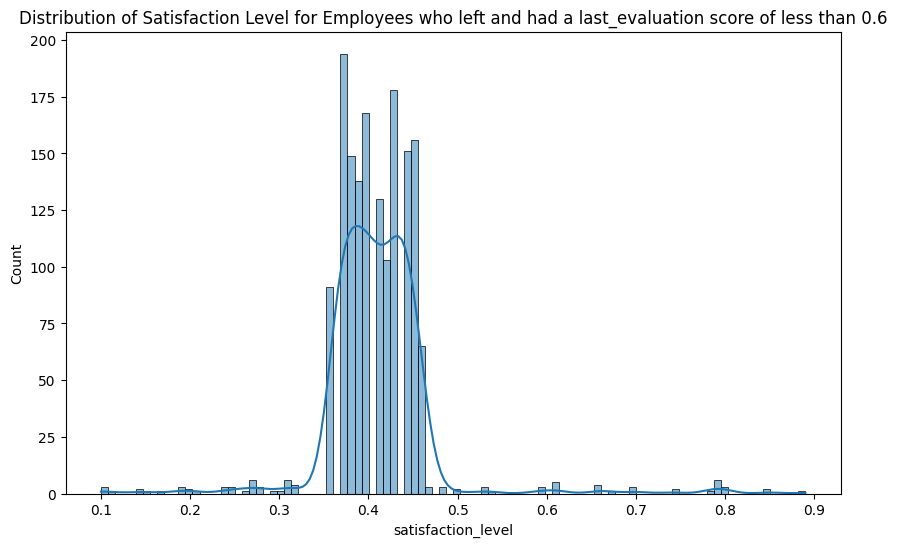

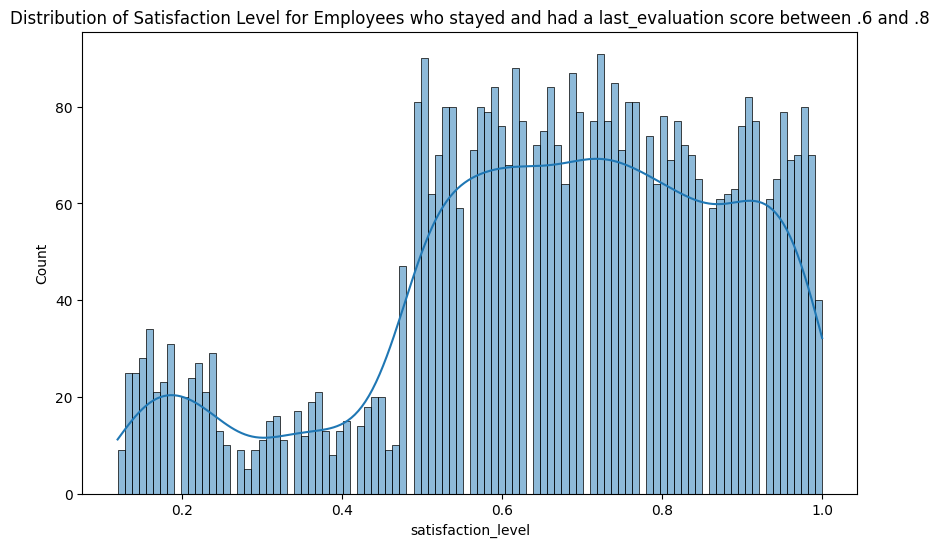

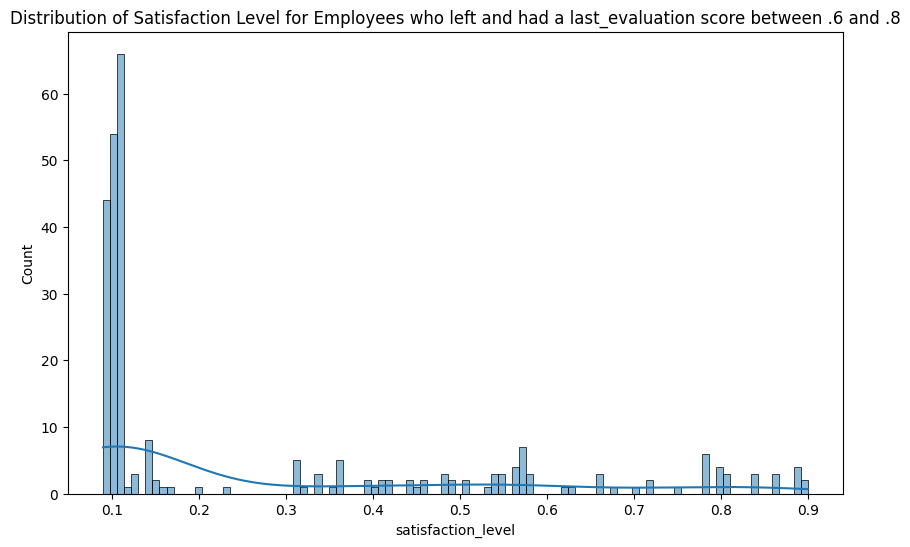

In [55]:
# Plot distribution of statifaction level for employees who left and had a last_evaluation score of less than 0.6
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['last_evaluation']<0.6)]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who left and had a last_evaluation score of less than 0.6')
plt.show()

# Plot distribution of statifaction level for employees who stayed and had a last_evaluation score between .6 and .8
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==0) & (df['last_evaluation']>=0.6) & (df['last_evaluation']<=0.8)]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who stayed and had a last_evaluation score between .6 and .8')
plt.show()

# Plot distribution of satisfaction level for employees who left and had a last_evaluation score between .6 and .8
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['last_evaluation']>=0.6) & (df['last_evaluation']<=0.8)]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who left and had a last_evaluation score between .6 and .8')
plt.show()



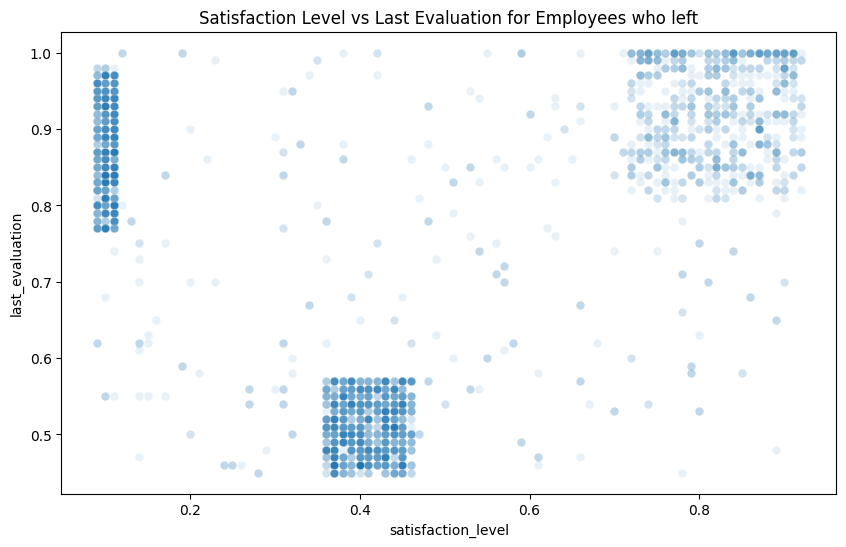

In [57]:
# Scatter plot of satisfaction_level and last_evaluation for those who left only
plt.figure(figsize=(10,6))
sns.scatterplot(data=df[df['left']==1], x='satisfaction_level', y='last_evaluation', alpha=0.1)
plt.title('Satisfaction Level vs Last Evaluation for Employees who left')
plt.show()


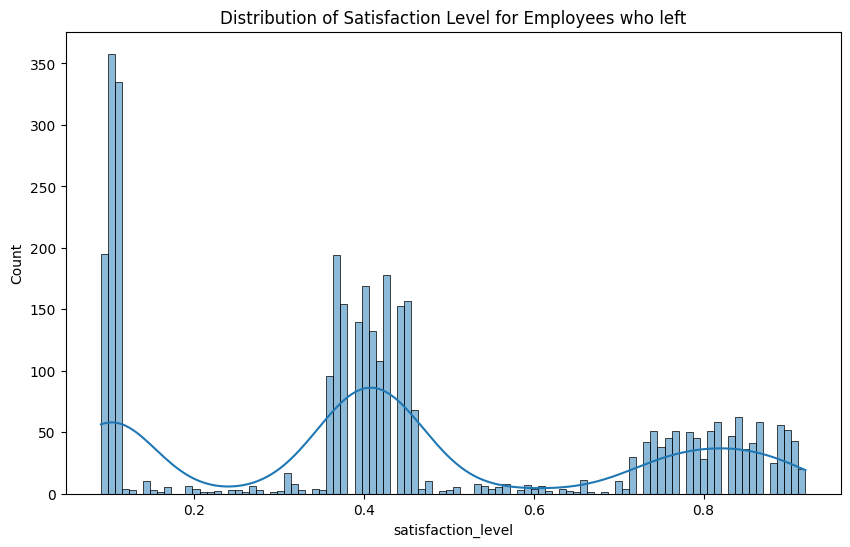

In [58]:
# plot distribution of the satisfaction level for employees who left
plt.figure(figsize=(10,6))
sns.histplot(df[df['left']==1]['satisfaction_level'], kde=True, bins=100)
plt.title('Distribution of Satisfaction Level for Employees who left')
plt.show()

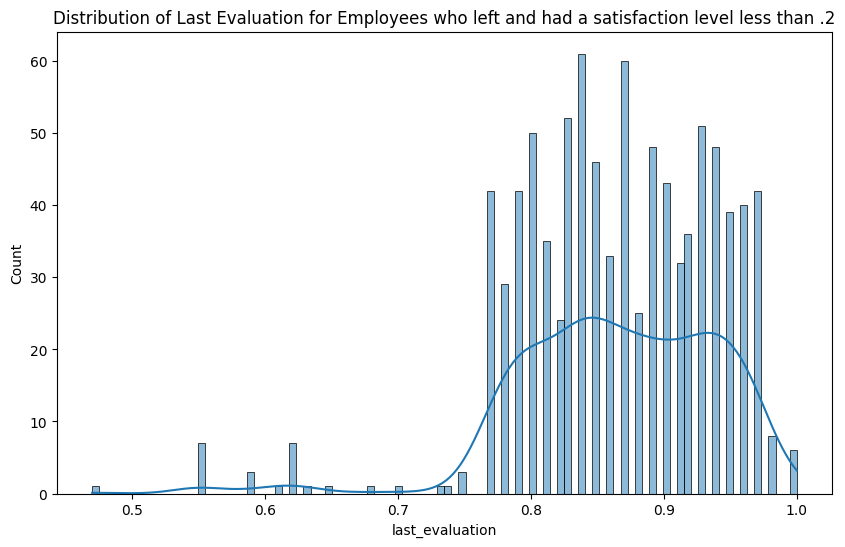

In [59]:
# Plot the distribution of the last_evaluation for employees who left and had a satisfaction level less than .2
plt.figure(figsize=(10,6))
sns.histplot(df[(df['left']==1) & (df['satisfaction_level']<0.2)]['last_evaluation'], kde=True, bins=100)
plt.title('Distribution of Last Evaluation for Employees who left and had a satisfaction level less than .2')
plt.show()


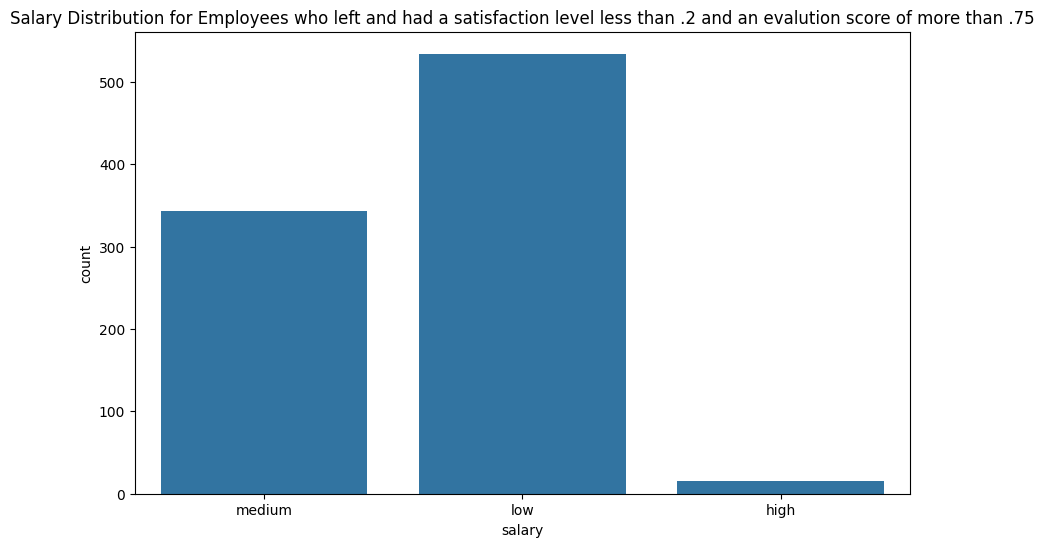

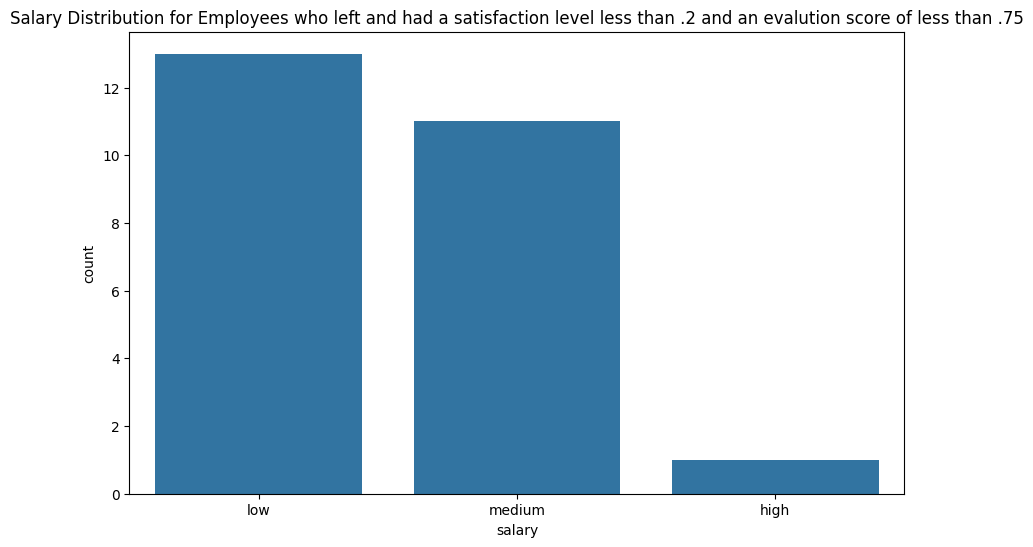

In [61]:
# Plot the salary distribution for employees who left and had a satisfaction level less than .2 and an evalution score of more than .75
plt.figure(figsize=(10,6))
sns.countplot(data=df[(df['left']==1) & (df['satisfaction_level']<0.2) & (df['last_evaluation']>0.75)], x='salary')
plt.title('Salary Distribution for Employees who left and had a satisfaction level less than .2 and an evalution score of more than .75')
plt.show()

# Then plot the salary distribution for employees who left and had a satisfaction level less then .2 and an evaluation score of less than .75
plt.figure(figsize=(10,6))
sns.countplot(data=df[(df['left']==1) & (df['satisfaction_level']<0.2) & (df['last_evaluation']<0.75)], x='salary')
plt.title('Salary Distribution for Employees who left and had a satisfaction level less than .2 and an evalution score of less than .75')
plt.show()
